# Computational Physics Club Meeting Notebook 
---
# Title: Exercise on the Simple Harmonic Oscillator: Visualizing Motion and Energy Dynamics
# Date: 27/02/2025
# Author: AlejoS
# Club: Computational Physics Club
---

## 1. Meeting Objectives
Understand Simple Harmonic Motion (SHO):

1. Review the fundamental equations governing SHO.
   
2. Visualize SHO Dynamics.
* Position vs Time
* Velocity vs Time
* Acceleration vs Time

3. Compute kinetic, potential, and total energy over time.
* Verify energy conservation in the system.
* Visualize energy exchange between kinetic and potential forms.
* Interpret the results.

Damping or external driving forces could be covered on another ocassion.

## 2. Theoretical Background
The Simple Harmonic Motion has one degree of freedom (we just need one variable to describe the motion of the simple pendulum, the mass-spring system or an LC circuit), then using Newtonian mechanics or by describing the system with a Lagrangian, we find the general form for the equation of motion.

$\frac{d^2 Z(t)}{dt^2} + \omega_0^2 Z(t) = 0$,

$\ddot{Z} + \omega_0^2 Z = 0$.

$\omega_0$ is the natural frequency of the simple harmonic oscillator.

We have a second order differential equation. It has the general solution,

$Z(t) = A \cos(\omega_0 t) + B \sin(\omega_0 t)$

where A and B are arbritray constants determined by the initial conditions of the system. 

We can still further write the solution in a more compact form using the trigonometry identity: $\cos(A + B) = \cos A \cos B - \sin A \sin B$ and the substitution: $A = C \cos\phi, B = C \sin\phi$. Then,

$Z(t) = C \cos(\omega_0 t + \phi)$

which is the form we are going to use for our computations.

It follows, by directly differentiating the latter equation, that we arrive to expressions of velocity and acceleration for the object in S.H.M too.

$\dot{Z(t)} = -C \omega_0 \sin(\omega_0 t + \phi)$

$\ddot{Z(t)} = -C \omega_0^{2} \cos(\omega_0 t + \phi)$

Now, what about the energy of the system?

We are describing an ideal system (no friction), so the total energy is conserved. Then, the potential has the form,

$V = \frac{1}{2}k Z^{2}$

also the kinetic energy is

$T = \frac{1}{2}m \dot{Z^{2}}$

Then, by substitution of the expressions for position and velocity into the expressions for the energies, we have that,

$E = T + V = \frac{1}{2}m C^{2} \omega_0^{2}$

$E = \frac{1}{2} k C²$

## 3. Code Implementation
## Problem

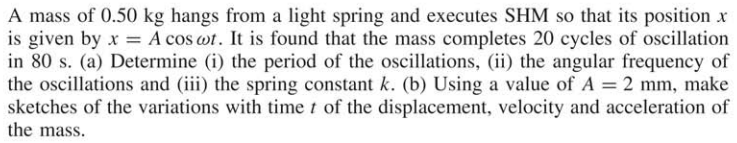

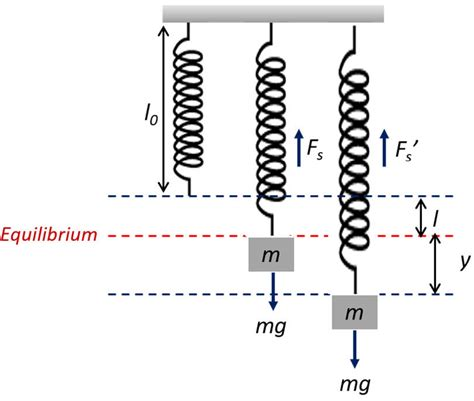

Image taken from: https://www.researchgate.net/publication/342652083/figure/fig1/AS:909027982712834@1593740568865/Vertical-Spring-Mass-System.jpg

In [19]:
#Import useful libraries (this is a comment)
import numpy as np #define alias to call the library, this library is the numerical python library
import matplotlib.pyplot as plt #for plotting

In [28]:
#Define the problem constants, we're working in the SI
m_1 = 0.5 #[kg]
f_1 = 1/4 #[cycles/s] #20/80 = 1/4
C_1 = 0.2 #[m] #we chose a not so small amplitude to better visualize the plots

In [21]:
#PART (a)
T_1 = 1/f_1 #the period is the inverse of the frequency
omega_1 = 2 * np.pi * f_1 #the angular frequency is equal to 2*pi*frequency of oscillations
k_1 = (omega_1**2)*m_1 #this comes from w²=k/m
print(T_1, omega_1, k_1)

4.0 1.5707963267948966 1.2337005501361697


Now, it is much better to present our results with the same number of significant figures and with units! We can do this the following way.

In [22]:
print("The period is:","{:.4f}".format(T_1), "[s]")
print("The natural angular frequency is:","{:.4f}".format(omega_1), "[1/s]")
print("The spring constant is:","{:.4f}".format(k_1), "[N/m]") #4f stands for four decimal places

The period is: 4.0000 [s]
The natural angular frequency is: 1.5708 [1/s]
The spring constant is: 1.2337 [N/m]


In [23]:
# PART (b)
#We need values to do the plotting, we can generate an array of values using np.arange()
t_1 = np.arange(0, 2*T_1, 0.01) #0 <= t <= T, we are going to plot 2 periods

#Define the functions to plot and feed them with the generated values for time
#Functions in python are vectorized, this means that vectors/arrays can be used for inputs, and the evaluation is element-wise

x_1 = C_1*np.cos(omega_1*t_1) #position
v_1 = -C_1*omega_1*np.sin(omega_1*t_1) #velocity
a_1 = -C_1*(omega_1**2)*np.cos(omega_1*t_1) #acceleration

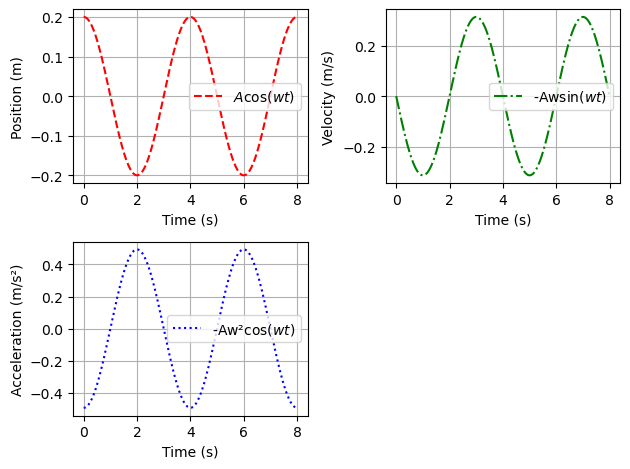

In [24]:
#Plotting
#Begin a figure environment
plt.figure()

#Subplots
plt.subplot(2, 2, 1)
plt.plot(t_1, x_1, color = "red", linestyle = "--", label = r"$A\cos(wt)$")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(t_1, v_1, color = "green", linestyle = "-.", label = r"-Aw$\sin(wt)$")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(t_1, a_1, color = "blue", linestyle = ":", label = r"-Aw²$\cos(wt)$")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s²)")
plt.grid()

# Show/Save
plt.tight_layout()
plt.show()
plt.close() #it is recommended to close images after rendering since they occupy memory

## Energy Dynamics

In [25]:
#Define the energies
E_T_1 = np.full_like(x_1, (1/2) * (k_1) * (C_1**2)) #generate an array of constant values to plot them, it has the same size as t_1
E_K_1 = (1/2)*(m_1)*(v_1**2)
E_V_1 = (1/2)*(k_1)*(x_1**2)

#print(E_T_1)

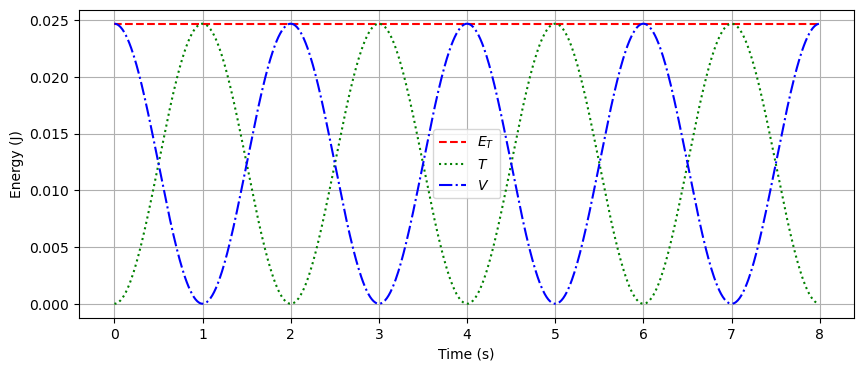

In [26]:
#Plotting Energies vs time
plt.figure(figsize=(10,4))

plt.plot(t_1, E_T_1, color = "red", linestyle = "--", label = r"$E_T$")
plt.plot(t_1, E_K_1, color = "green", linestyle = ":", label = r"$T$")
plt.plot(t_1, E_V_1, color = "blue", linestyle = "-.", label = r"$V$")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.grid()
plt.show()
plt.close()

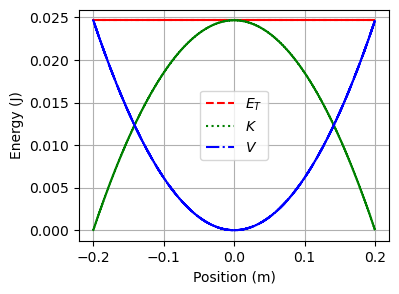

In [27]:
#Plotting Energies vs position
plt.figure(figsize=(4,3))

plt.plot(x_1, E_T_1, color = "red", linestyle = "--", label = r"$E_T$")
plt.plot(x_1, E_K_1, color = "green", linestyle = ":", label = r"$K$")
plt.plot(x_1, E_V_1, color = "blue", linestyle = "-.", label = r"$V$")
plt.legend()
plt.xlabel("Position (m)")
plt.ylabel("Energy (J)")
plt.grid()
plt.show()
plt.close()

## 4. Analysis and Discussion
* From the position, velocity, acceleration vs time plots we find that:
  * The velocity is at a maximum when the object is at equilibrium (x=0).
  * The velocity is zero when the object is at its mamximum amplitude.
  * The acceleration is maximized when the object is at its maximum amplitude.
  * The acceleration is zero when the object is at equilibrium.

* From the energies vs time plot we find that the potential and kinetic energies oscillate inversely respect to each other, i.e, as one decreases the other increases. But, the total mechanical energy stays constant over time.

* From the energies vs position plot we find that when the potential energy is zero at equilibrim the kinetic energy is at its maximum and viceversa.


## 6. References
Pain, H. J. (2005). The physics of vibrations and waves (6th ed.). John Wiley & Sons

Serway, R. A., & Jewett, J. W. (2018). Physics for Scientists and Engineers (10th ed.). Cengage Learning.
